In [3]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from fc_net import *
from data_utils import get_CIFAR10_data
from solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [4]:
# Load the (preprocessed) CIFAR10 data.
data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


In [11]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
solver = None

solver = Solver(model, data, update_rule='sgd',optim_config={'learning_rate': 1e-4,},
                lr_decay=0.95,num_epochs=10, batch_size=200,print_every=5000)
solver.train()


(Iteration 1 / 2450) loss: 2.301337
(Epoch 0 / 10) train acc: 0.131000; val_acc: 0.117000
(Epoch 1 / 10) train acc: 0.243000; val_acc: 0.248000
(Epoch 2 / 10) train acc: 0.281000; val_acc: 0.293000
(Epoch 3 / 10) train acc: 0.343000; val_acc: 0.318000
(Epoch 4 / 10) train acc: 0.317000; val_acc: 0.351000
(Epoch 5 / 10) train acc: 0.362000; val_acc: 0.370000
(Epoch 6 / 10) train acc: 0.353000; val_acc: 0.388000
(Epoch 7 / 10) train acc: 0.380000; val_acc: 0.391000
(Epoch 8 / 10) train acc: 0.402000; val_acc: 0.404000
(Epoch 9 / 10) train acc: 0.404000; val_acc: 0.405000
(Epoch 10 / 10) train acc: 0.435000; val_acc: 0.420000


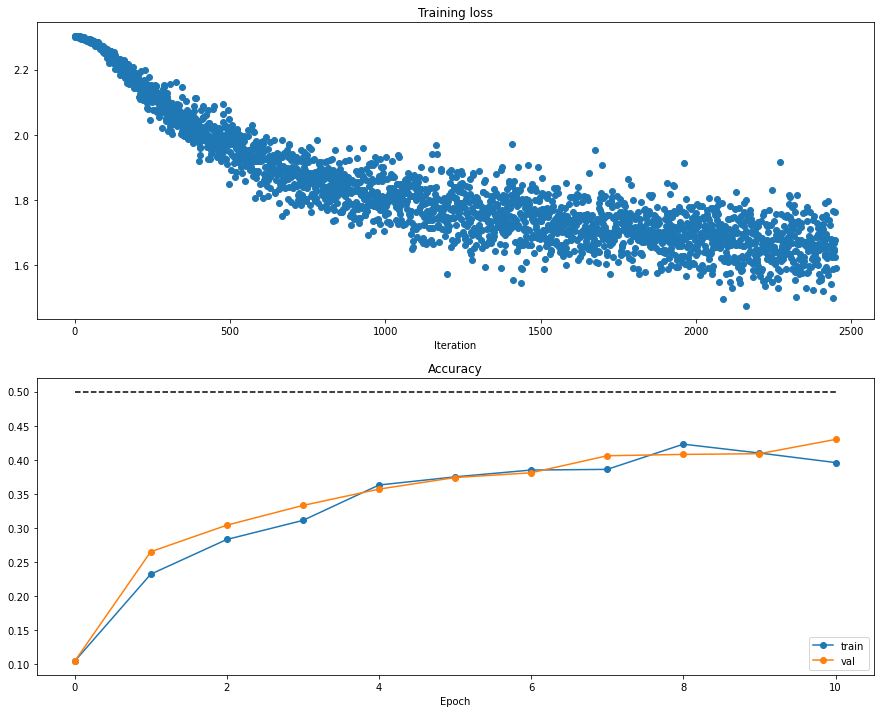

In [8]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

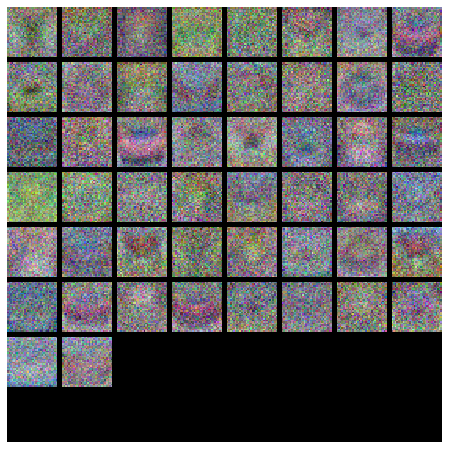

In [9]:
from vis_utils import visualize_grid

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

In [10]:
best_model = None

results = {}
best_val = -1
best_model = None

learning_rates = [9e-4, 1e-3, 3e-3]
reg_strength = [0.1, 0.001, 0.0001, 0.000001] 
batch_size = [100,300,500]

for lr in learning_rates:
  for rs in reg_strength:
    for bs in batch_size:
      model = TwoLayerNet(input_size, hidden_size, num_classes)
      solver = Solver(model, data, update_rule='sgd',optim_config={'learning_rate': lr,},
                      lr_decay=0.95, num_epochs=5, batch_size=bs, print_every=5000)
      solver.train()
      valid_accuracy = solver.check_accuracy(data['X_val'], data['y_val'])
      train_accuracy = solver.check_accuracy(data['X_train'], data['y_train'])
      
      if valid_accuracy > best_val:
        best_val = valid_accuracy
        best_model = solver

for lr, rs in sorted(results):
    train_accuracy, val_accuracy = results[(lr, rs)]
    print('lr %e rs %e train accuracy: %f val accuracy: %f' % (
                lr, rs, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)


(Iteration 1 / 2450) loss: 2.304948
(Epoch 0 / 5) train acc: 0.131000; val_acc: 0.107000
(Epoch 1 / 5) train acc: 0.428000; val_acc: 0.435000
(Epoch 2 / 5) train acc: 0.455000; val_acc: 0.446000
(Epoch 3 / 5) train acc: 0.476000; val_acc: 0.447000
(Epoch 4 / 5) train acc: 0.499000; val_acc: 0.481000
(Epoch 5 / 5) train acc: 0.549000; val_acc: 0.473000
(Iteration 1 / 815) loss: 2.305101
(Epoch 0 / 5) train acc: 0.099000; val_acc: 0.102000
(Epoch 1 / 5) train acc: 0.392000; val_acc: 0.390000
(Epoch 2 / 5) train acc: 0.427000; val_acc: 0.426000
(Epoch 3 / 5) train acc: 0.480000; val_acc: 0.472000
(Epoch 4 / 5) train acc: 0.490000; val_acc: 0.469000
(Epoch 5 / 5) train acc: 0.477000; val_acc: 0.473000
(Iteration 1 / 490) loss: 2.304055
(Epoch 0 / 5) train acc: 0.095000; val_acc: 0.097000
(Epoch 1 / 5) train acc: 0.332000; val_acc: 0.344000
(Epoch 2 / 5) train acc: 0.409000; val_acc: 0.411000
(Epoch 3 / 5) train acc: 0.440000; val_acc: 0.430000
(Epoch 4 / 5) train acc: 0.436000; val_acc: 0.

Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_16284\2387060840.py", line 31, in <cell line: 25>
    solver.train()
  File "c:\Users\User\Desktop\projects\twoLayerNet\solver.py", line 263, in train
    self._step()
  File "c:\Users\User\Desktop\projects\twoLayerNet\solver.py", line 181, in _step
    loss, grads = self.model.loss(X_batch, y_batch)
  File "c:\Users\User\Desktop\projects\twoLayerNet\fc_net.py", line 130, in loss
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\

In [ ]:
y_val_pred = best_model.check_accuracy(data['X_val'],data['y_val'])
y_test_pred = best_model.check_accuracy(data['X_test'], data['y_test'])
print('Validation set accuracy: ', y_val_pred)
print('Test set accuracy: ', y_test_pred)